In [3]:
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
import matplotlib.animation as animation
from matplotlib.lines import Line2D
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from bsedata.bse import BSE
import numpy as np

class BasicGraph(tk.Frame):
    def __init__(self,master=None,dt=2,maxt=200):
        super().__init__(master)
        self.rootWindow = master
        self.dt=dt
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(111)
        self.maxt=maxt
        self.createWidget()
        
    def createWidget(self):
        self.canvas = FigureCanvasTkAgg(self.fig,master=self.rootWindow)
        self.canvas.draw()
        self.toolbar = NavigationToolbar2Tk(self.canvas,self.rootWindow)
        self.toolbar.update()
        self.canvas.get_tk_widget().pack()
        self.pack()
        
    def update(self,y):
        try:
            self.tdata
        except AttributeError as e:
            self.tdata=[0]
            self.ydata=[y[0]]
            self.line = Line2D(self.tdata, self.ydata)
            self.ax.add_line(self.line)
            self.ax.set_ylim(0,3000)
            self.ax.set_xlim(0,self.maxt)
            
        
        lastt=self.tdata[-1]
        if lastt > self.tdata[0]+self.maxt:
            self.tdata.pop(0)
            self.ydata.pop(0)
            self.ax.set_xlim(self.tdata[0],self.tdata[0]+self.maxt)
#             self.ax.figure.canvas.draw()
#         if lastt > self.tdata[0]+self.maxt:
#             self.tdata.pop()
#             self.ydata.pop()

        cval, hval = y
        t = self.tdata[-1] + self.dt
        self.tdata.append(t)
        self.ydata.append(cval)
        
        try:
            self.analyser.process(hval,self.tdata)
        except AttributeError as e:
            print(e)
            self.analyser = Analyser(self.ax,self.rootWindow,cval)
            self.analyser.process(hval,self.tdata)
        
        self.line.set_data(self.tdata,self.ydata)
        return self.line,

class Analyser:
    def __init__(self,ax,root,startVal,sequence=["rod","range"],stoppingPer=50):
        print("Starting Analysing patterns")
        self.ax=ax
        self.rootWindow=root
        self.ydata=[1]
        self.startValue = startVal
        self.maxVal = 0
        self.minVal = 99999999
        self.stoppingVal = self.startValue * stoppingPer / 100
        self.startSensing = False
        self.line = Line2D([1],self.ydata)
        self.rod = Rod(self.ax, [0,self.startValue], [0,self.startValue])
        self.rangePer = 0.5
        self.ytickQty = 10
#         self.sequence = sequence
#         self.currentPattern = 0
#         self.sequenceDetectedDict = {}
#         for pattern in sequence:
#             sequenceDict[pattern]=False
            
#             if sequenceDetectedDict[]
        
    def process(self,value,xval):
        self.ydata.append(value)
        self.line.set_data(xval,self.ydata)
        
        if self.startValue < value and not self.startSensing:
            self.startSensing = True
#         try:        
#             if value < self.halfRod+self.startValue:
#                 print("Stopping: halfrod was at " + str(self.halfRod+self.startValue) + " and next value was " + str(value))
#                 self.rootWindow.destroy()
#         except AttributeError as e:
#             print(e)
        if self.startSensing:
#             Look out for rod pattern
            
            if self.maxVal < value:
                self.maxVal = value
                self.rod.update([xval[-1],self.maxVal])
                try:
#                     reset range on getting detecting new rod and update starting value for range
                    self.halfRod = (self.maxVal - self.startValue)*self.rangePer
                    self.range.updateStart([xval[-1],value])
                    self.range.resetRange()

#             make range object if there not already made
                except AttributeError as e:
                    print(e)
                    self.halfRod = (self.maxVal - self.startValue)*self.rangePer
                    self.range = Range(self.ax,[self.rod.endx,self.rod.endy])
                self.resetScale()

#             Finding Range Pattern
            elif self.minVal > value:  
                self.minVal = value
                self.resetScale()
                self.range.updateEnd([xval[-1],self.minVal])
            else:
                self.range.updateEnd([xval[-1],self.minVal])
            
#         Try to update range
#         self.ax.set_ylim(self.minVal*0.9,1.1*self.maxVal)

    def resetScale(self):
        self.ylowerLim = self.minVal*0.9
        self.yupperLim = 1.1*self.maxVal
#             self.ax.set_ylim(self.minVal*0.9,1.1*self.maxVal)
        self.ax.set_ylim(self.ylowerLim,self.yupperLim)
        if self.minVal < self.maxVal:
            self.ax.set_yticks(np.arange(self.ylowerLim,self.yupperLim,((self.yupperLim-self.ylowerLim)/self.ytickQty)))
        
        
class Range:
    def __init__(self,ax,start):
        assert type(start)==list or type(start)==np.array, "[Range __init__] Pass either list or np.array with x any y values"
        assert len(start) == 2, "[Range __init__]Please pass 2D coordinates for starting and ending value"
        self.startx,self.starty = start
        self.endx,self.endy = None,None
        self.ax = ax
        self.height = 0
        
    def updateStart(self,start):
        self.startx,self.starty = start
    
    def resetRange(self):
        self.height = 0
        self.ax.patches=[]
        self.endx,self.endy = None,None
        
    def updateEnd(self,endingPoint):
        self.endx,self.endy = endingPoint
        self.ax.patches=[]
        newHeight = abs(self.starty-self.endy)
        if newHeight > self.height:
            self.height = newHeight
        rect = patches.Rectangle((self.startx,self.starty-self.height-10),abs(self.startx-self.endx),self.height+10,color='green')
        rect.set_alpha(0.3)
        self.ax.add_patch(rect)
    
    def __str__(self):
        return "Range is from [" + str(self.startx) + ", " + str(self.starty) + "] to [" + str(self.endx) + ", " + str(self.endy) + "]"
        
class Rod:
    def __init__(self,ax,start,end,width=100):
        assert type(start)==type(end) and (type(start)==list or type(start)==np.array), "[Rod __init__] Pass either list or np.array with x any y values"
        assert len(start) == 2 and len(end) == 2, "[Rod __init__]Please pass 2D coordinates for starting and ending value"
        self.startx = start[0]+1
        self.starty = start[1]
        self.endx = end[0]
        self.endy = end[1]
        self.ax = ax
        self.width = width
        
    def update(self, newEnding):
        assert len(newEnding) == 2, "[Rod update] Please pass 2D coordinates for starting and ending value"
        self.endx = newEnding[0]
        self.endy = newEnding[1]
        try:
            self.rodLine.remove()
        except AttributeError as e:
            print(e)
        self.rodLine = Line2D([self.startx,self.endx],[self.starty,self.endy],5,color='red')
        self.rodLine.set_alpha(0.3)
#         rect.set_alpha(0.5)
        self.ax.add_line(self.rodLine)
    def __str__(self):
        return "Rod is from [" + str(self.startx) + ", " + str(self.starty) + "] to [" + str(self.endx) + ", " + str(self.endy) + "]"
    
        
class App:
    def __init__(self, emitter, companyName="Stock price line Graph"):
        root = tk.Tk()
        root.title(companyName)
        self.updateData = emitter
        graph=BasicGraph(master=root)
        ani = animation.FuncAnimation(graph.fig, graph.update, self.updateData, interval=500,blit=False)
        graph.mainloop()

'BasicGraph' object has no attribute 'analyser'
Starting Analysing patterns
'Rod' object has no attribute 'rodLine'
'Analyser' object has no attribute 'range'


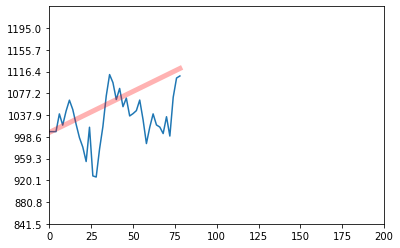

In [4]:
def emitter():
    data = open('tempData.xls').read().split('\n')
    for line in data[1:]:
        d = line.split(',')
        yield float(d[1]),float(d[2])
        
def liveData():
    from bsedata.bse import BSE
    b = BSE()
    while True:
        data=b.getQuote("534976")
        cval = data['currentValue']
        high = data['dayHigh']
        yield float(cval),float(high)

from bsedata.bse import BSE
b = BSE()
a = App(emitter,"Temp Stock")

# Why min value is not indicated into range
# Now work on detecting break out